In [119]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

#### Dataset Overview

In [120]:
columns_name = [ 'symboling', 'losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
               'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
               'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
               'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
               'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [121]:
# Load the dataset
df = pd.read_csv(URL,header = None, names = columns_name)

In [122]:
# Verify the first few rows of the dataset and check the column headers
df.head()

,symboling,losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [123]:
df.shape

(205, 26)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   losses             205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [125]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [126]:
train_data = df.replace('^\?{1}', np.nan, regex=True)
train_data.drop(["losses"],axis='columns', inplace=True)

In [127]:
train_data.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [128]:
idx = np.where(train_data["price"].isnull())
train_data = train_data.drop(train_data.index[idx])

In [129]:
categorical_columns = [ 'symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
               'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
               'fuel_system']

continuous_columns = [ 'wheel_base', 'length',
               'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
               'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

#check the distribution of categorical variables

In [130]:
#Check the distribution of values in categorical columns
#Training data and Categorical columns list
def get_category_distribution(train_data,categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train_data[cat_column].value_counts())
    return(categorical_column_distribution)

In [131]:
categorical_column_distribution = get_category_distribution(train_data,categorical_columns)

In [132]:
categorical_column_distribution

[ 0    65
  1    52
  2    32
  3    27
 -1    22
 -2     3
 Name: symboling, dtype: int64,
 toyota           32
 nissan           18
 mazda            17
 mitsubishi       13
 honda            13
 subaru           12
 volkswagen       12
 peugot           11
 volvo            11
 dodge             9
 mercedes-benz     8
 bmw               8
 plymouth          7
 saab              6
 audi              6
 porsche           4
 alfa-romero       3
 jaguar            3
 chevrolet         3
 renault           2
 isuzu             2
 mercury           1
 Name: make, dtype: int64,
 gas       181
 diesel     20
 Name: fuel_type, dtype: int64,
 std      165
 turbo     36
 Name: aspiration, dtype: int64,
 four    113
 two      86
 Name: num_of_doors, dtype: int64,
 sedan          94
 hatchback      68
 wagon          25
 hardtop         8
 convertible     6
 Name: body_style, dtype: int64,
 fwd    118
 rwd     75
 4wd      8
 Name: drive_wheels, dtype: int64,
 front    198
 rear       3
 Name: e

In [133]:
length_categorical_columns = list(map(lambda x:len(x),categorical_column_distribution))

In [134]:
#count the number of columns having the same number of unique values
distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

In [135]:
distribution_dict

{6: 2, 22: 1, 2: 4, 5: 1, 3: 1, 7: 1, 8: 1}

In [136]:
##Plot a bar-graph

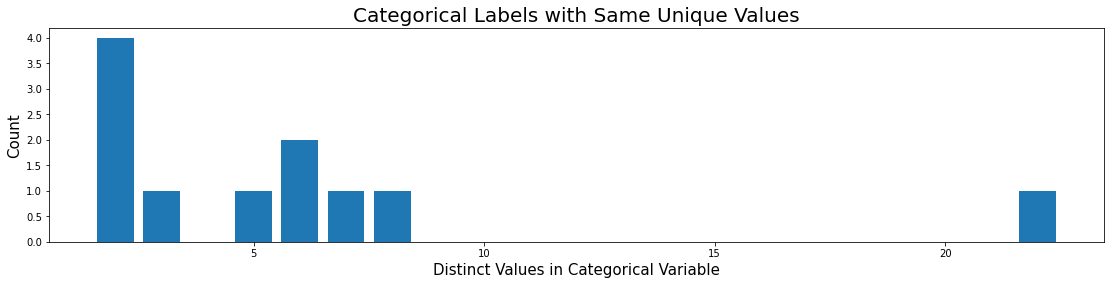

In [137]:
#plot showing the count of columns having same number of unique values
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

In [138]:
##check the distribution of continuous variables

In [139]:
#filter out the continous columns and view the descriptive statistics
train_data[continuous_columns].describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [140]:
##Data cleaning and pre-processing

In [141]:
#Check if there is any missing value in the columuns
#value of 0 indicates no missing values
missing_values = train_data.isnull().sum()
np.max(missing_values)

4

In [142]:
#Displaying the columns with missing values
columns_with_missing = train_data.columns[train_data.isnull().any()]
print(columns_with_missing)

Index(['num_of_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm'], dtype='object')


In [143]:
class Data_preprocessing_handling:
    def __init__(self,train_data):
        self.train_data = train_data
    
    def handle_missing_value_continuous(self,column_names_with_specific_type,imputation_type="mean"):
        if imputation_type=="mean":
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=mean_imputer.transform(self.train_data[column_names_with_specific_type])
        if imputation_type=="median":
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            median_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=median_imputer.transform(self.train_data[column_names_with_specific_type])
        return self.train_data
    
    def handle_missing_value_categorical(self,column_names_with_specific_type,imputation_type="most_frequent"):
        most_frequent = SimpleImputer(strategy="most_frequent")
        most_frequent.fit(self.train_data[column_names_with_specific_type])
        self.train_data[column_names_with_specific_type] = most_frequent.transform(train_data[column_names_with_specific_type])
        return self.train_data
    
    def handle_outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data

In [144]:
Data_preprocessing_obj = Data_preprocessing_handling(train_data)
train_data = Data_preprocessing_obj.handle_missing_value_continuous(continuous_columns,"median")
train_data = Data_preprocessing_obj.handle_missing_value_categorical(categorical_columns)
train_data["price"] = train_data['price'].astype(float)

# Section on handling outliers in the dataset

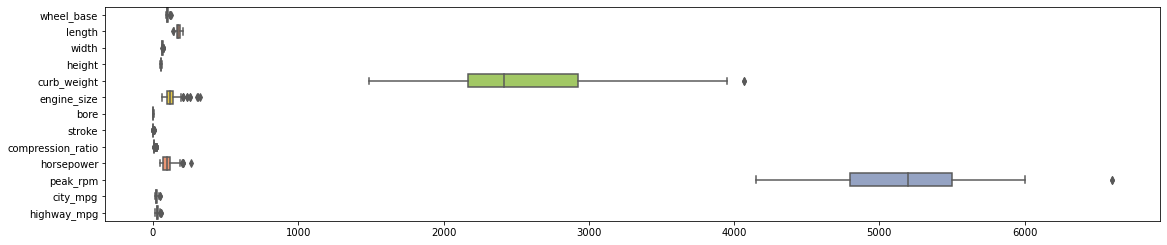

In [145]:
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

In [146]:
columns_with_outlier = [ 'wheel_base', 'length',
               'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
               'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

In [147]:
#compute the interquartile range for all continuous columns
Q1 = train_data[continuous_columns].quantile(0.25)
Q3 = train_data[continuous_columns].quantile(0.75)
IQR = (Q3-Q1)
train_data = Data_preprocessing_obj.handle_outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

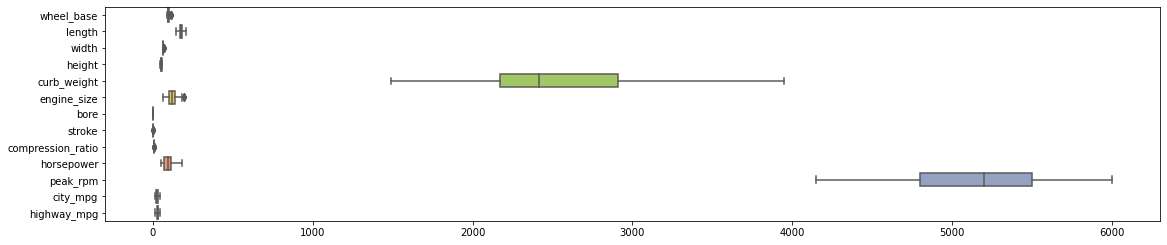

In [148]:
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

In [149]:
##Feature elimination techniques for continuous and categorical features¶

In [150]:
#Function for feature selection of numeric variables
#Remove variables with constant variance
#Remove variables with Quasi-Constant variance with a fixed threshold
#Remove correlated variables

def feature_selection_numerical_variables(train_data,qthreshold,corr_threshold,exclude_numerical_cols_list):
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data[numerical_columns].columns 
                    if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns = [column for column in train_data[numerical_columns].columns 
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    #remove correlated variables
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train_data,constant_columns,qconstant_columns,correlated_features
    

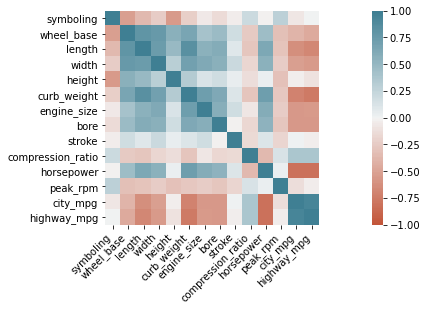

In [151]:
train_data,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train_data,0.01,0.75,['price'],)

In [152]:
correlated_features

{'city_mpg', 'highway_mpg', 'length', 'width'}

In [153]:
##Handling correlation between categorical variables¶

In [154]:
# save the encoders to disk to be fitted on test data
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename = cf1+".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1])

In [155]:
#snippet to calculate the unique values with a categorical columns
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count = len(train_data[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [156]:
#snippet to identify the dependent/correlated categorical variables and drop them
columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against],train_data[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [157]:
train_data = train_data.drop(columns_to_drop_cat,axis=1)

In [158]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

#output the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("./model/columns_to_drop.csv",index=False)

# Visualizing the Output Variable

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

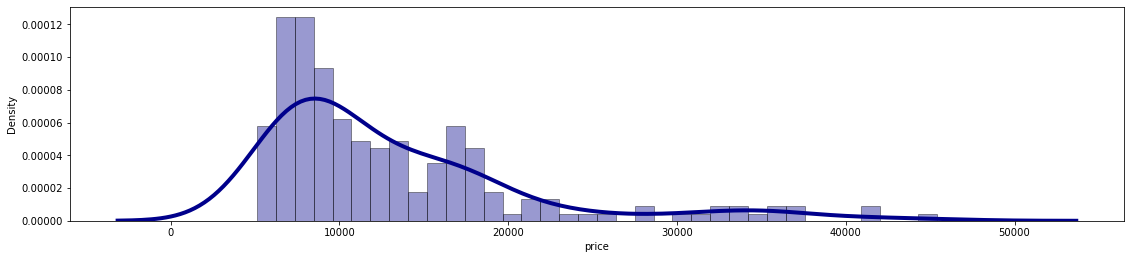

In [159]:
# Visualizing the distribution of price value
# Density Plot and Histogram of price
sns.distplot(train_data['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [160]:
#We will use a log transformation on the dependent variable to reduce the scale
train_data['price'] = np.log(train_data['price'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

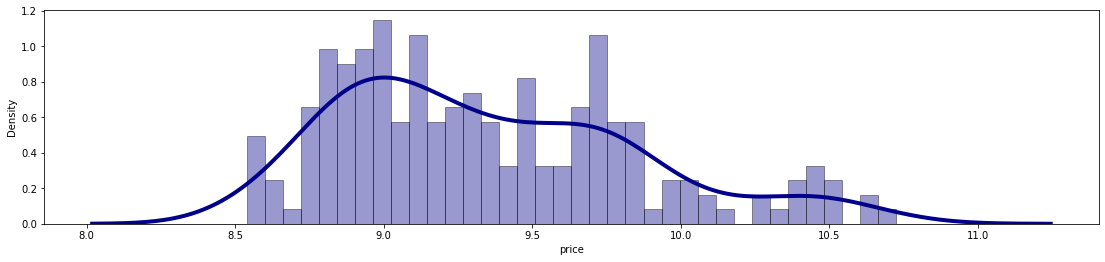

In [161]:
# Visualizing the distribution of price value
# Density Plot and Histogram of price
sns.distplot(train_data['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# MODEL

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [163]:
#convert the int64 columns categorical
Column_datatypes= train_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category',copy=False)
X,y = train_data.drop(['price'],axis=1),train_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
# Instantiate model with 100 decision trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [165]:
#save the model output
pickle.dump(rf_base, open("basemodel_rf", 'wb'))

In [166]:
#load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [167]:
#validate the accuracy of the base model
#compare the model accuracies
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.18418222362932035


# HyperParameter Tuning Using RandomSearchCV

In [168]:
#number of trees
n_estimators = [100,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [200,400,600]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [169]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [170]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 400,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [171]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Tuned model accuracy: 0.5733295838115159


# fit a GBM model

In [172]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
gbm_base = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_base.fit(X_train,y_train)

#save the GBM model
pickle.dump(gbm_base, open("basemodel_GBM", 'wb'))

In [173]:
#load the saved model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

Y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Base model GBM accuracy: 0.23408075513141224
